1. [Simple Moving Average Strategy](#Simple-Moving-Average-Strategy)

1. [Pyfolio Backtesting](#Pyfolio-Backtesting)

## Import libraries

In [1]:
import pandas as pd
import pyfolio as pf
from joblib import load
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import zipline
%load_ext zipline

# Simple Moving Average Strategy
<a id = "Dual Moving Average Strategy"></a>

## Baseline Strategy

There are two common strategies in finance: <i>momentum strategy</i>, usually referred to as trend trading and, the opposite, <i>reversion strategy</i>, frequently known as convergence or cycle trading. In this project, we will focuse on momentum strategies, whereby we will exploit upward/downward trends of our stock.<br> 

More concretely, we will perform a **simple moving average crossover**, which occurs when a moving average crosses the price. This signal is used to identify that momentum is shifting in the direction of the moving average. A buy signal is generated when the moving average crosses the price and rises above it, while a sell signal is triggered by a moving average crossing the price and falling below it.<br>

We customise one of [zipline examples](#https://github.com/quantopian/zipline/tree/master/zipline/examples) next, with the following specifications:
<ul>
    <li>initial capital base of 10.000 USD</li>
    <li>trading period of 635 days (corresponding to the last ML model's test cross-validation sample <code>03_ml_strategy.ipynb</code>, from 2015-5-13 to 2018-3-15</li>
    <li>moving average lookback period of 8 days (same prediction window as for ML strategy)</li>
    <li>trading logic: if the moving average crosses up the price, we trade 100 shares and viceversa</li>
    <li>no volatility provision, capital constraint or exit market conditions have been defined</li>
    <li>no commissions or slippage have been defined either</li>
</ul>

In [112]:
%%zipline --start 2015-5-13 --end 2018-3-15 --capital-base 10000.0 -o ../strategies/models/sma_strategy.joblib --no-benchmark -b quandl

from zipline.api import order_percent, record, symbol, order_target, order


# parameters
ma_periods = 8
stock = 'AAPL'

def initialize(context):
    context.time = 0
    context.asset = symbol(stock)
    context.has_position = False

def handle_data(context, data):
    context.time += 1
    record(time=context.time)
    if context.time < ma_periods:
        return

    price_history = data.history(context.asset, fields="price", bar_count=ma_periods, frequency="1d")
    ma = price_history.mean()

    # cross up
    if (price_history[-2] < ma) & (price_history[-1] > ma):
        order(context.asset, 100)
        context.has_position = True
    # cross down
    elif (price_history[-2] > ma) & (price_history[-1] < ma):
        order(context.asset, -100)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           moving_average=ma)

/home/isabel/anaconda3/envs/ml_for_algo_trading/lib/python3.5/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/home/isabel/anaconda3/envs/ml_for_algo_trading/lib/python3.5/site-packages/empyrical/stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,excess_return,gross_leverage,long_exposure,long_value,longs_count,max_drawdown,max_leverage,moving_average,net_leverage,orders,period_close,period_label,period_open,pnl,portfolio_value,positions,price,returns,sharpe,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,time,trading_days,transactions,treasury_period_return
2015-05-13 20:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,NaN,0.000000,[],2015-05-13 20:00:00+00:00,2015-05,2015-05-13 13:31:00+00:00,0.00000,10000.00000,[],NaN,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,1,1,[],0.0
2015-05-14 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,NaN,0.000000,[],2015-05-14 20:00:00+00:00,2015-05,2015-05-14 13:31:00+00:00,0.00000,10000.00000,[],NaN,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,2,2,[],0.0
2015-05-15 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,NaN,0.000000,[],2015-05-15 20:00:00+00:00,2015-05,2015-05-15 13:31:00+00:00,0.00000,10000.00000,[],NaN,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,3,3,[],0.0
2015-05-18 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,NaN,0.000000,[],2015-05-18 20:00:00+00:00,2015-05,2015-05-18 13:31:00+00:00,0.00000,10000.00000,[],NaN,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,4,4,[],0.0
2015-05-19 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,NaN,0.000000,[],2015-05-19 20:00:00+00:00,2015-05,2015-05-19 13:31:00+00:00,0.00000,10000.00000,[],NaN,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,5,5,[],0.0
2015-05-20 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,NaN,0.000000,[],2015-05-20 20:00:00+00:00,2015-05,2015-05-20 13:31:00+00:00,0.00000,10000.00000,[],NaN,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,6,6,[],0.0
2015-05-21 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,NaN,0.000000,[],2015-05-21 20:00:00+00:00,2015-05,2015-05-21 13:31:00+00:00,0.00000,10000.00000,[],NaN,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,7,7,[],0.0
2015-05-22 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,129.747500,0.000000,[],2015-05-22 20:00:00+00:00,2015-05,2015-05-22 13:31:00+00:00,0.00000,10000.00000,[],132.540,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,8,8,[],0.0
2015-05-26 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.00000,10000.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,130.198750,0.000000,"[{'dt': 2015-05-26 20:00:00+00:00, 'limit': No...",2015-05-26 20:00:00+00:00,2015-05,2015-05-26 13:31:00+00:00,0.00000,10000.00000,[],129.620,0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.0,0.0,9,9,[],0.0
2015-05-27 20:00:00+00:00,0.003365,-0.000670,None,0.0,0.0,None,13197.79775,23197.79775,-13204.5,-13204.5,0.0,1.321336,0.0,0.0,0,-0.000670,1.321336,130.585625,-1.321336,"[{'dt': 2015-05-27 20:00:00+00:00, 'limit': No...",2015-05-27 20:00:00+00:00,2015-05,2015-05-27 13:31:00+00:00,-6.70225,9993.29775,"[{'last_sale_price': 132.04500000000002, 'sid'...",132.045,-0.000670,-5.019960,-13204.5,-13204.5,1,-5.019960,10000.00000,0.0,0.0,10,10,[{'order_id': '2206825ea9df42b3aa9d9d05ce7f051...,0.0


We then load our strategy for further analysis and we plot
<ol>
    <li>stock price and moving average</li>
    <li>portfolio's value</li>
</ol>
For an interactive plot with altair, please refer to <code>04_trading_viz.ipynb</code>

In [4]:
sma = load('../strategies/models/sma_strategy.joblib')

In [7]:
sma = sma.to_csv('../reports/sma_strategy.csv')

In [3]:
sma = pd.read_csv('../reports/sma_strategy.csv', parse_dates=True)

/home/isabel/anaconda3/envs/ml_for_algo_trading/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


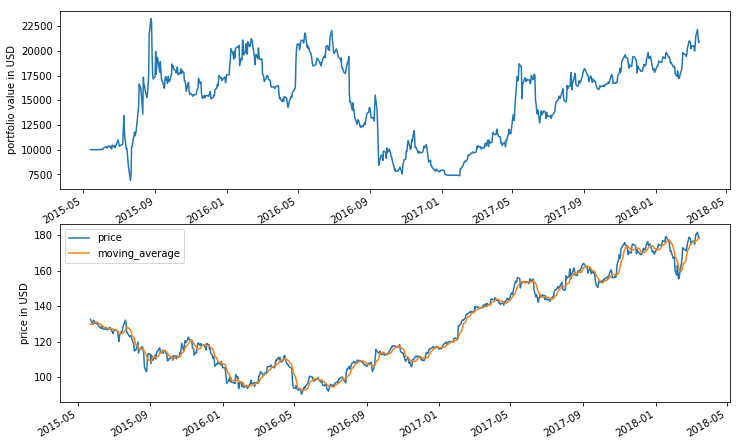

In [5]:
import matplotlib
matplotlib.use('Agg')

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
sma.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('portfolio value in USD')

ax2 = fig.add_subplot(212)
sma['price'].plot(ax=ax2)
sma['moving_average'].plot(ax=ax2)
ax2.set_ylabel('price in USD')
plt.legend(loc=0)
plt.show()

fig.savefig('../images/SimpleMovingAverage(TA).png')

In big...

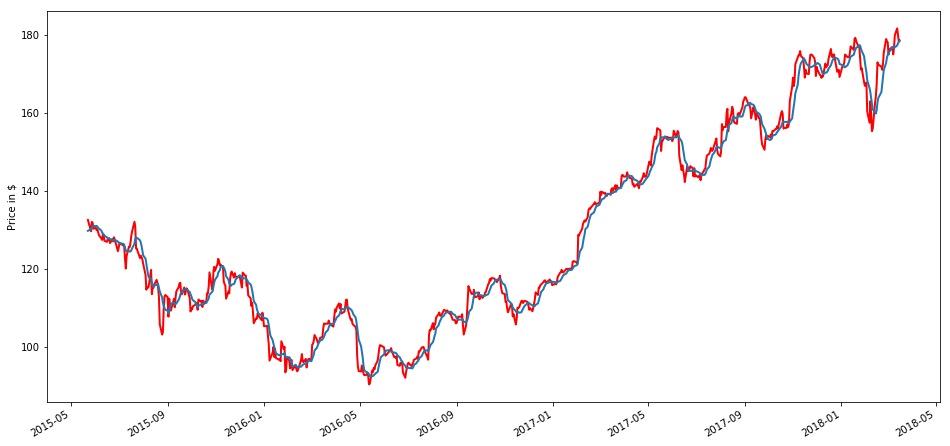

In [7]:
# Initialize the plot figure
fig = plt.figure(figsize=(16, 8))      

# Subplot for axes 2
ax1 = fig.add_subplot(111, ylabel='Price in $')

# Plot the price and two moving averages
sma['price'].plot(ax=ax1, color='r', lw=2.)
sma['moving_average'].plot(ax=ax1, lw=2.)

# Plot the buy and sell signals
ax1.plot(sma.loc[sma.positions == 1.0].index, 
         sma['moving_average'][sma['positions'] == 1.0],
         '^', markersize=10, color='m')
ax1.plot(sma.loc[sma.positions == -1.0].index, 
         sma['moving_average'][sma['positions'] == -1.0],
         'v', markersize=10, color='k')

plt.show()

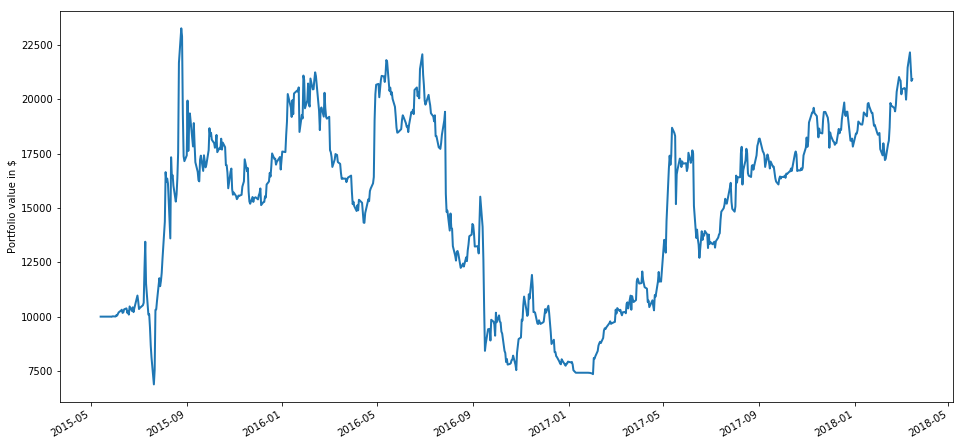

In [8]:
# Initialize the plot figure
fig = plt.figure(figsize=(16, 8))      

# Subplot for axes 1
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
sma['portfolio_value'].plot(ax=ax1, lw=2.)

ax1.plot(sma.loc[sma.positions == 1.0].index, 
         sma['portfolio_value'][sma.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(sma.loc[sma.positions == -1.0].index, 
         sma['portfolio_value'][sma.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

And finally, we retrieve our portfolio value on our last trading day and the sum of capital used during the trading period. We invested 60,537 USD and achieved a 20,922 USD portfolio's value.

In [7]:
'${:.2f}'.format(sma['portfolio_value'].iloc[-1])

'$20922.67'

In [9]:
'${:.2f}'.format(sma.capital_used.sum())

'$-60537.33'

# Pyfolio Backtesting
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Pyfolio is a common tool for trading strategy backtesting that is integrated in Zipline local research environment.

## Pyfolio's full tear sheet:

In [9]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(sma)

/home/isabel/anaconda3/envs/ml_for_algo_trading/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  """Entry point for launching an IPython kernel.


Start date,2015-05-13
End date,2018-03-15
Total months,34
,Backtest
Annual return,29.7%
Cumulative returns,109.2%
Annual volatility,70.8%
Sharpe ratio,0.71
Calmar ratio,0.43
Stability,0.01
Max drawdown,-68.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,68.38,2015-08-24,2017-01-31,NaT,NaN
1,48.80,2015-07-09,2015-07-20,2015-08-03,18
2,18.31,2015-08-04,2015-08-10,2015-08-11,6
3,11.77,2015-08-11,2015-08-17,2015-08-20,8
4,5.66,2015-06-29,2015-07-01,2015-07-08,8


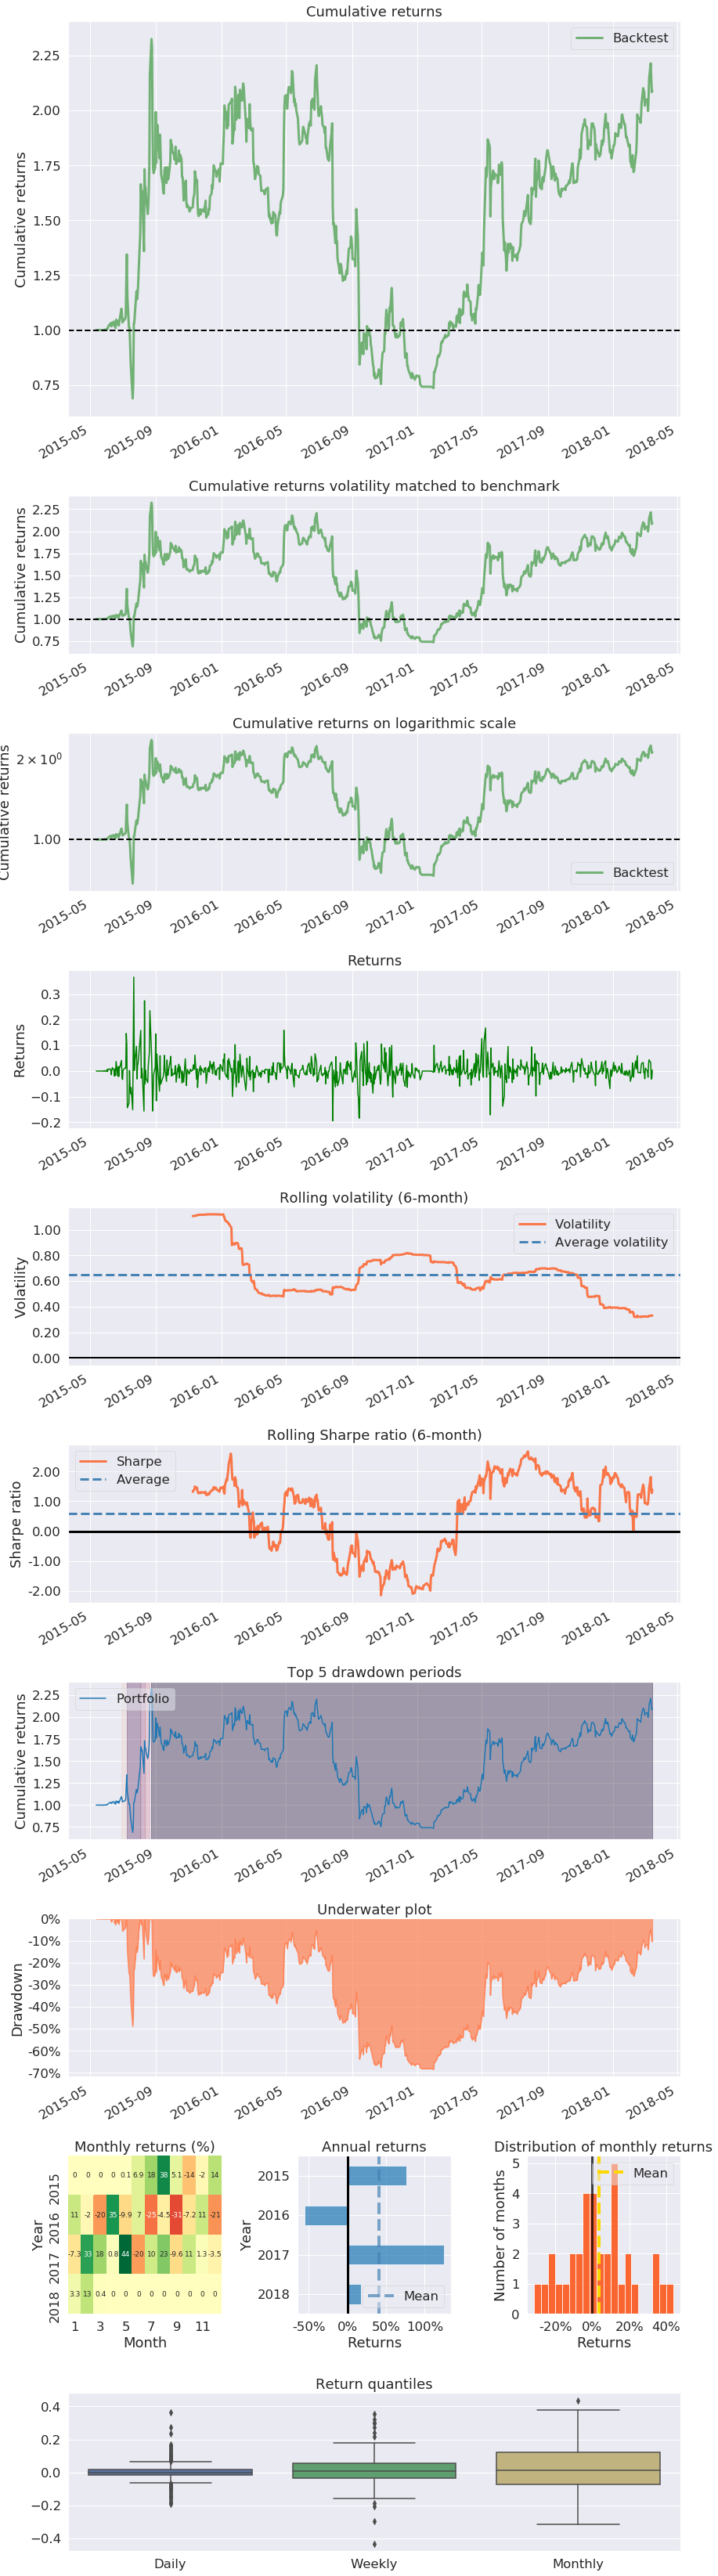

In [10]:
matplotlib.use('Agg')

fig = pf.create_returns_tear_sheet(returns, return_fig=True)
fig.savefig('../images/viz/preparatory_images/sma_backtest.png')

## Individual Pyfolio's plots

We will customise the plots for a more in-depth analysis (see [Quantopian's lecture](#https://www.quantopian.com/lectures/portfolio-analysis)).<br>
As a reminder, it is adviced in Zipline's version 1.4 to set benchmark to false, and subsequently, we have no benchmark data.

In [11]:
[f for f in dir(pf.plotting) if 'plot_' in f]

['plot_annual_returns',
 'plot_capacity_sweep',
 'plot_cones',
 'plot_daily_turnover_hist',
 'plot_daily_volume',
 'plot_drawdown_periods',
 'plot_drawdown_underwater',
 'plot_exposures',
 'plot_gross_leverage',
 'plot_holdings',
 'plot_long_short_holdings',
 'plot_max_median_position_concentration',
 'plot_monthly_returns_dist',
 'plot_monthly_returns_heatmap',
 'plot_monthly_returns_timeseries',
 'plot_perf_stats',
 'plot_prob_profit_trade',
 'plot_return_quantiles',
 'plot_returns',
 'plot_rolling_beta',
 'plot_rolling_returns',
 'plot_rolling_sharpe',
 'plot_rolling_volatility',
 'plot_round_trip_lifetimes',
 'plot_sector_allocations',
 'plot_slippage_sensitivity',
 'plot_slippage_sweep',
 'plot_turnover',
 'plot_txn_time_hist',
 'show_and_plot_top_positions']

### Cumulative returns

Cumulative returns of 109,2% over the whole period.

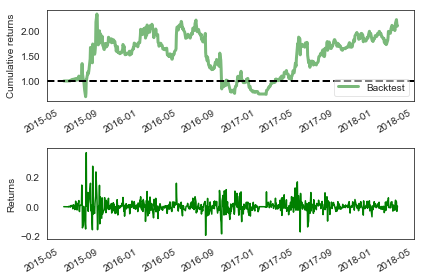

In [12]:
# Cumulative Returns
sns.set_style("white")
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(returns)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(returns)
plt.tight_layout()

### Distribution of returns

The graphs on distribution of returns gauge how the algorithm performs on a yearly and monthly basis.<br>
In this case, it particularly performed well in 2015 and 2017, with mixed results in 2016. The monthly returns'distribution is similar to the stock's returns (<code>01_eda_quandl.ipynb</code>).

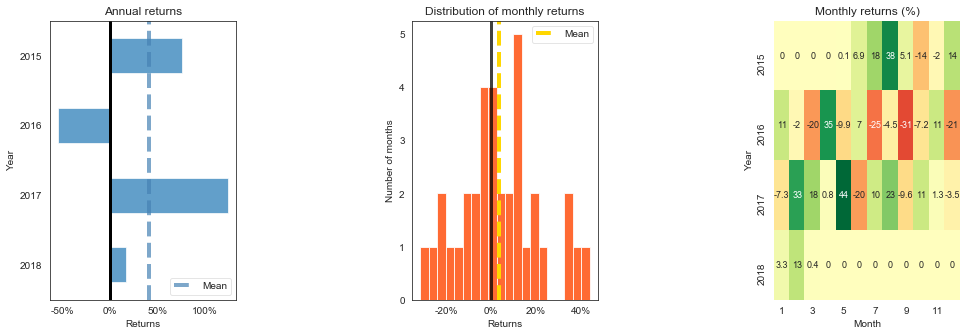

In [13]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(returns)
plt.tight_layout()
fig.set_size_inches(15,5)

Box and whiskers are illustrative of the median, quarters returns (25th and 75th percentile) and outliers. On a monthly basis, whiskers (returns falling out of the 25th - 75th percentiles) rank +/-40%, which reflect that returns are spread out, which is very inconvenient when these are negative. The trading strategy should adequately address volatility.

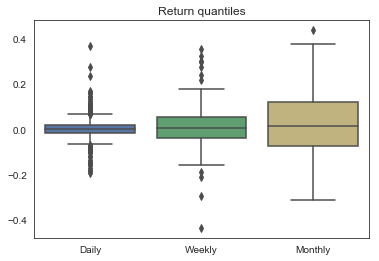

In [14]:
pf.plot_return_quantiles(returns);

### Rolling plots

Rolling plots show how an estimate changes throughout backtest period. A Sharpe ratio is the average return earned in excess of risk-free asset over its volatility; it is a mesure of portfolio performance. A low Sharpe ratio indicates higher volatility per unit return meaning that the strategy is riskier or non-performing at certain points in time.<br>

In this particular case, the Sharpe ratio has been less than 1% on average and peaking at +/-2% (or above) at the beginning of 2016, beginning 2017, September 2017 and beginning 2018. This also overlaps with great returns' period (positive or negative), though it should be further explored if any market-events influencing this behaviour occurred during that period.

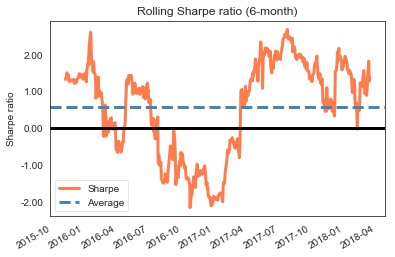

In [15]:
pf.plot_rolling_sharpe(returns);

### Drawdown graphs

The first graph portrays the top 5 drawdown periods measured in terms of cumulative returns and the second graph depicts percentage drawdown. Both plots should in principle allow for a quick check into the time periods during which the algorithm fared with difficulties. The less volatile an algorithm is, the minimal the drawdowns.<br>

In this particular case, the graph depicts the whole trading window as a drawdown ranging from -20% and -60% returns...

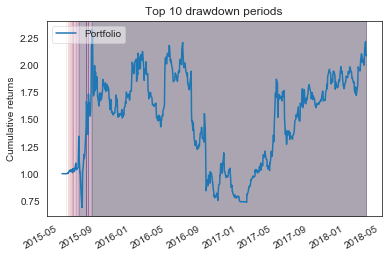

In [16]:
pf.plot_drawdown_periods(returns);


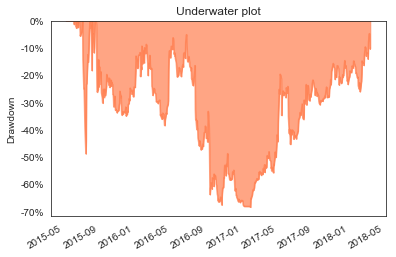

In [17]:
pf.plot_drawdown_underwater(returns);

### Gross leverage ratio

This is an important ratio as it affects the trade on margin. <br>

Good strategies generally start with an initial leverage of 1, which can be adapted upon strategy's viability. A lower Sharpe ratio indicates that the strategy has a higher volatility per unit return, making it riskier to lever up. On the other hand, a higher Sharpe ratio indicates lower volatility per unit return, allowing for leverage increase and also returns.<br>

This strategy reports three leverage peaks in September 2015, October 2016 and June 2017.

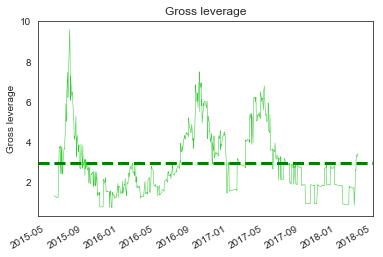

In [18]:
pf.plot_gross_leverage(returns, positions);

### Daily turnover

This plot reflects how many shares are traded as a fraction of total shares, which can be indicative of the transaction costs associated to the algorithm but also provide a better out of sample estimation.

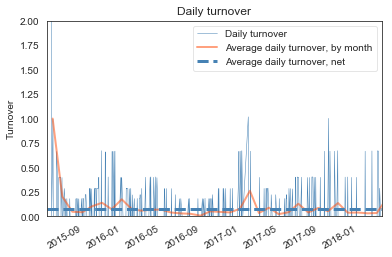

In [19]:
pf.plot_turnover(returns, transactions, positions);

Here, we see that until the beginning of 2017, shorts positions dominated and the other way round from beginning 2017 on.

### Risk Exposure

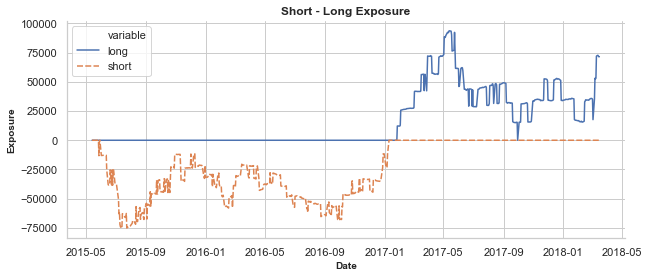

In [17]:
# Short and Long Exposure
vol = pd.DataFrame({'date':sma.date,
                   'long':sma['long_exposure'],
                   'short':sma['short_exposure']})

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

sns.lineplot(x='date',
             y='value',
             hue='variable',
             style='variable',
             data=pd.melt(vol, ['date']))

sns.despine()
    
plt.xlabel("Date", fontsize = 10, fontweight = "semibold")
plt.ylabel("Exposure", fontsize = 10, fontweight = "semibold")
plt.title("Short - Long Exposure", fontsize = 12, fontweight = "semibold")

plt.show()

### Profit and Loss

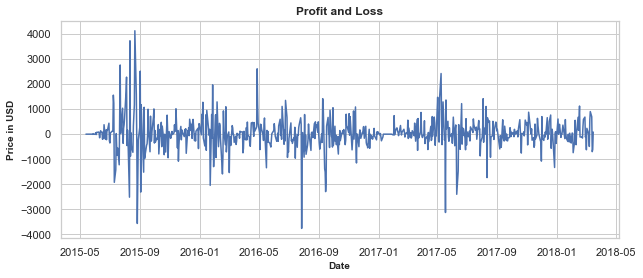

In [8]:
# Profit and Loss
plt.figure(figsize=(10, 4))

sns.set(style="whitegrid")

fig =sns.lineplot(x=sma.date,
             y=sma['pnl'],
             data=sma)
    
plt.xlabel("Date", fontsize = 10, fontweight = "semibold")
plt.ylabel("Price in USD", fontsize = 10, fontweight = "semibold")
plt.title("Profit and Loss", fontsize = 12, fontweight = "semibold")

plt.show()